<a href="https://colab.research.google.com/github/Ness731/kgu_bootcamp/blob/main/simulated_annealing_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import math
import random

In [4]:
data = pd.read_csv('Input_data.csv')

In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
# dataFrame 타입을 list로 변환
input=[]
for i in range(0,100):
    input.append([data.loc[i][1], data.loc[i][2]])
type(input)

list

In [7]:
# 거리를 구하는 함수
def get_dist(start, dest) :
  d = math.sqrt(pow(( start[0] - dest[0]), 2) + pow((start[1] - dest[1]), 2))
  return d

# 경로의 총 거리를 구하는 함수
def Z(path):
  dist = 0
  start= 0
  for i in range(0,100):
    # 인접한 두 도시의 거리를 계산
    start = input[path[i]]
    dest = input[path[i+1]]
    d = get_dist(start,dest)

    # 앞서 구한 거리를 총 거리에 반영
    dist += d
  return dist

# 랜덤 경로를 생성하는 함수
def random_solution():
  path=[0] # 출발지는 0번
  remain = list(range(1, 100)) # 나머지 99개의 도시
  # random.shuffle(remain) # shuffle 함수를 통해 도시를 섞기
  path += remain
  path += [0] # 최종 도착지는 0번
  return path

# current solution을 받아 neighbor soluiond을 생성하는 함수
def neighbor_solution(X_cur): 
  # 1. 교환할 두 도시의 인덱스를 선정. 이 때, 출발/도착지인 0번째 도시는 제외
  city1 = 0
  city2 = 0
  while(1):
    city1 = random.randrange(1, 99)
    city2 = random.randrange(1, 99)
    if(city1 != city2): # 같은 숫자가 아니라면 탈출
      break
  X_neighbor = X_cur

  # 2. 두 도시의 위치를 바꾸기
  X_neighbor = X_cur
  X_neighbor[city1], X_neighbor[city2] = X_neighbor[city2], X_neighbor[city1]

  return X_neighbor

In [8]:
# 매개변수 초기화
T_0 = 10000 # 초기 온도
delta = 0.1 # 쿨링 온도
T_final = 1e-10  # 허용 가능한 최소 온도
cutoffTime = 60*3  # 최대 런타임

In [9]:
# 초기 솔루션 생성
X_0 = random_solution()
X_cur = X_0
Z_cur = Z(X_0)
T_cur = T_0
X_best = X_0
Z_best = Z_cur

In [10]:
# 그래프 생성을 위해 모든 솔루션을 저장할 리스트
Z_cur_list = [Z_cur]
Z_best_list = [Z_best]

In [11]:
import time
start = time.time() # 런타임 측정

while 1:
  # neighbor solution 생성 및 거리 구하기 (최초에는 랜덤한 경로를 받음)
  X_prime = neighbor_solution(X_cur)
  Z_prime = Z(X_prime)
  # 담금질 기법 적용
  if Z_prime < Z_cur:
    X_cur = X_prime
    Z_cur = Z_prime
  else:
    c = Z_prime - Z_cur
    #  neighbor solution의 거리에 대한 계산 결과가 기준값보다 크다면
    e = math.exp(1)**(-c / T_cur)
    print(e)
    if random.random() < e :
      #  neighbor solution을 채택
      X_cur = X_prime
      Z_cur = Z_prime
  if Z(X_cur) < Z_best:
    X_best = X_cur
    Z_best = Z(X_cur)

  # 채택했던 솔루션을 리스트에 저장
  Z_cur_list.append(Z_cur)
  Z_best_list.append(Z_best)
  
  # 현재 온도와 런타임이 허용 가능한지 검사
  runTime = time.time() - start  
  T_cur -= delta
  if (T_cur < T_final) or (runTime > cutoffTime) :
    break;

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
0.9921762119846551
0.9614565404730991
0.9929811350758473
0.9718884657349289
0.9386488894227725
0.9888737992785945
0.9476661572758167
0.9840333018253558
0.9975673645604515
0.9940003170546892
0.9871892321035012
0.9902324001952767
0.9546640475227476
0.9808452759230413
0.9574854012829108
0.9511872366792163
0.9994307296689593
0.9957282376297608
0.9849941571868069
0.994467071937455
0.9781741919355227
0.9825428069566869
0.9419229643913896
0.9834001512055301
0.9235937596676103
0.994454324247248
0.9683628776960216
0.9701172051971396
0.9223016266025212
0.9464010172341117
0.9807980699862924
0.9960871303467681
0.9613817087562619
0.9557097944752962
0.9711020160640723
0.9851959024332684
0.9567115802461179
0.9085150720935175
0.9970806710389079
0.9887796718016857
0.9320235353425351
0.9990432305294062
0.9483645095985012
0.9308817586817685
0.9944842527270469
0.9727636029432029
0.9749522796111513
0.9848648911141925
0.9857429773218876
0.9964717113955032
0.98908554548165

*** 최적의 경로 : [0, 17, 91, 75, 73, 39, 79, 48, 29, 78, 82, 11, 43, 45, 34, 5, 19, 87, 88, 25, 85, 28, 70, 37, 35, 4, 86, 51, 76, 30, 20, 81, 47, 57, 1, 77, 59, 3, 83, 63, 55, 84, 14, 16, 46, 69, 10, 18, 32, 71, 24, 26, 31, 22, 65, 66, 61, 68, 13, 50, 67, 15, 74, 52, 53, 44, 36, 7, 40, 89, 92, 96, 38, 2, 80, 60, 54, 62, 90, 97, 49, 93, 33, 95, 8, 94, 41, 12, 6, 9, 72, 98, 21, 42, 64, 58, 27, 56, 23, 99, 0]
*** 최적의 거리 : 2205.3641197304614


<function matplotlib.pyplot.show(*args, **kw)>

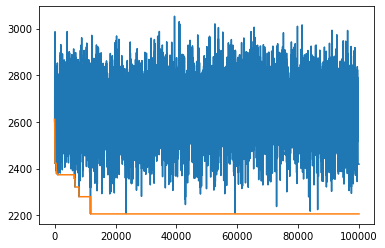

In [12]:
import matplotlib.pyplot as plt

print("*** 최적의 경로 :", X_best)
print("*** 최적의 거리 :", Z_best)

plt.plot(Z_cur_list)
plt.plot(Z_best_list)

plt.show

In [13]:
import csv
import math

file = open('Input_data.csv')

csvreader = csv.reader(file)

print(csvreader)
header = []
header = next(csvreader)

cities = []
for row in csvreader:
  cities.append(row)

file.close()

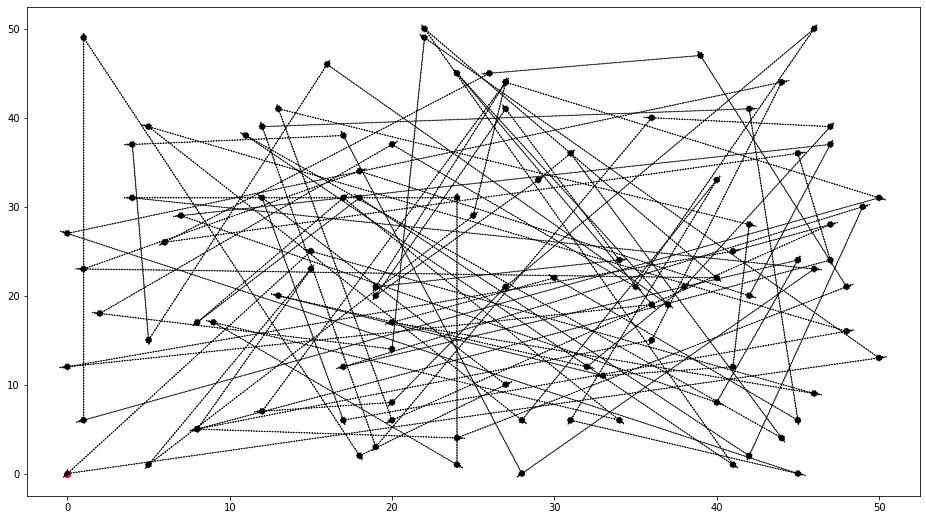

In [14]:
# 문제 2
import matplotlib.pyplot as plt
import numpy as np
route = [[0,0]]

for i in X_best :
  if(i == 99): 
    break
  r = [i+1, get_dist(input[i], input[i+1])]
  route.append(r)

last = [0, get_dist(input[X_best[-2]], input[0])]
route.append(last)

x_list = [row[1] for row in cities]
y_list = [row[2] for row in cities]

x_list = list(map(float,x_list))
y_list = list(map(float,y_list))
del x_list[0]
del y_list[0]

# xpoints = np.array(x_list)
# ypoints = np.array(y_list)

plt.figure(figsize = (16,9))
plt.scatter(x_list, y_list, marker = 'o', linestyle = 'dotted', color = 'black')
plt.scatter(0, 0, marker = 'o', color = 'red')

# plt.axes()
for i in range(len(route)):
  if i == len(route) - 1:
    plt.arrow(float(cities[route[i][0]][1]), float(cities[route[i][0]][2]), 0 - float(cities[route[i][0]][2]), 0 - float(cities[route[i][0]][2]), width = 0.03,
              linestyle = 'dotted',overhang = 0, color = 'black', head_width = 0.3)
    break
  plt.arrow(float(cities[route[i][0]][1]), float(cities[route[i][0]][2]), 
            float(cities[route[i+1][0]][1]) - float(cities[route[i][0]][1]), 
            float(cities[route[i+1][0]][2]) - float(cities[route[i][0]][2]),
            width = 0.03,linestyle = 'dotted',overhang = 0, color = 'black', head_width = 0.3,
            head_length = 0.5)

plt.show()